In [1]:
import torch
from torch import nn, optim # 神经网络+优化函数
import matplotlib.pyplot as plt
from time import perf_counter

In [2]:
x = torch.linspace(-3, 3, 100000)
x = x.unsqueeze(dim=1) # 1维数据转化为2维
y = x+1.2*torch.rand(x.size())

In [27]:
class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(1,1) # x, y都是一维的
        self.criterion = nn.MSELoss() # 损失函数 Mean Squared Error    criterion: 准则
        self.optimizer = optim.SGD(self.parameters(), lr=0.01)
        
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [25]:
def set_cuda(inputs, target, model):
    '''
    CUDA SETTINGS
    '''
    CUDA = torch.cuda.is_available()
    if CUDA:
        inputs = inputs.cuda()
        target = target.cuda()
        model = model.cuda()
    model.requires_grad=True
    return inputs, target, model
    
def train(inputs, target, model:LinearRegression, epochs:int):
    output = None
    loss = None
    for epoch in range(epochs):
        output = model(inputs)
        loss = model.criterion(output, target)
        model.optimizer.zero_grad()
        loss.backward()
        model.optimizer.step()
        # if epoch % 1000 ==0:
        #     draw(inputs.cpu(), target.cpu(), output.cpu(), loss)
    if output is not None and loss is not None:
        draw(inputs.cpu(), target.cpu(), output.cpu(), loss)
    return model, loss

def draw(inputs, target, output, loss):
    '''
    散点+预测线图+loss值
    '''
    plt.cla()
    plt.scatter(inputs.numpy(), target.numpy())
    plt.plot(inputs.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.xlabel(f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    # plt.text(1.50, 0, s=f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)
        

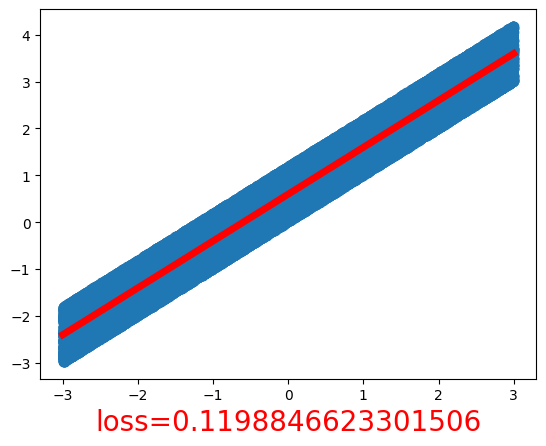

calculate time: 28.10838109999895
final loss:0.1198846623301506
weights: [Parameter containing:
tensor([[0.9999]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.5989], device='cuda:0', requires_grad=True)]


In [29]:
LRModel = LinearRegression()
inputs, target, model = set_cuda(x, y, LRModel)


start = perf_counter()
LRModel, loss = train(inputs, target, LRModel, epochs=100000)
finish = perf_counter()
cal_time = finish - start
print(f"calculate time: {cal_time}")
print(f"final loss:{loss.item()}")
print("weights:", list(LRModel.parameters()))